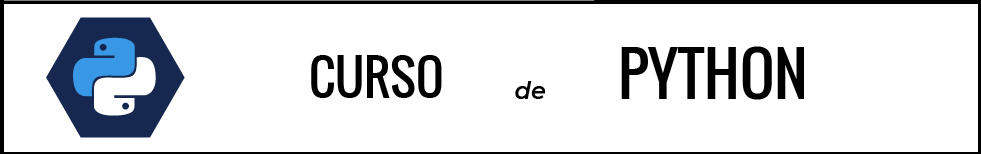

# Introducción a la producción de gráficos con matplotlib

_Después de estudiar la sintaxis de Python y empezar a manejar datos numéricos de manera un poco más profesional, ha llegado el momento de visualizarlos._ 

_Con la biblioteca **matplotlib** podemos crear gráficos de muy alta calidad y altamente personalizables._

_**matplotlib** es una biblioteca muy potente que requiere tiempo de práctica para dominarla. Vamos a empezar por lo más sencillo._

## La biblioteca matplotlib

* Estándar *de facto* para visualización en Python
* Pretende ser similar a las funciones de visualización de MATLAB
* Diferentes formas de usarla: interfaz `pyplot` y orientada a objetos

Lo primero que vamos a hacer es importar los paquetes necesarios para trabajar.

El paquete `pyplot` se suele importar bajo el alias `plt`, de modo que todas las funciones se acceden a través de `plt.<funcion>`. La función más básica es la función `plot`:

In [1]:
import matplotlib.pyplot as plt

La biblioteca **matplotlib** es gigantesca y es difícil hacerse una idea global de todas sus posibilidades en una primera toma de contacto. 

Es recomendable tener a mano la documentación y la galería (http://matplotlib.org/gallery.html#pylab_examples):

Si hacemos clic en cualquiera de las imágenes, accedemos al código fuente que la ha generado (ejemplo: http://matplotlib.org/examples/pylab_examples/annotation_demo.html):

In [2]:
import numpy as np

## Interfaz pyplot

La interfaz `pyplot` proporciona una serie de funciones que operan sobre un *estado global* - es decir, nosotros no especificamos sobre qué gráfica o ejes estamos actuando. Es una forma rápida y cómoda de crear gráficas pero perdemos parte del control.

### Función `plot`

### Un primer gráfico

La función `plot` recibe una sola lista (si queremos especificar los valores *y*) o dos listas (si especificamos *x* e *y*). Naturalmente si especificamos dos listas ambas tienen que tener la misma longitud.

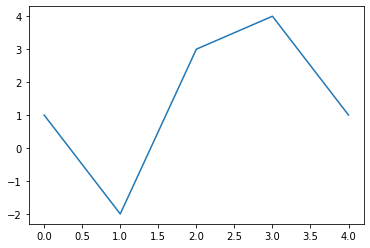

In [3]:
a = [1, -2, 3, 4, 1]
plt.plot(a)

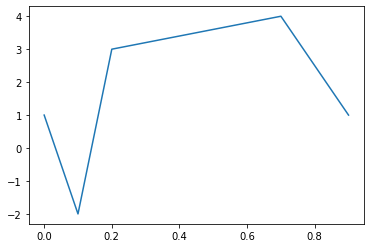

In [4]:
x = [0.0, 0.1, 0.2, 0.7, 0.9]
y = [1, -2, 3, 4, 1]
plt.plot(x,y)

La tarea más habitual a la hora de trabajar con matplotlib es representar una función. Lo que tendremos que hacer es definir un dominio y evaluarla en dicho dominio.

Por ejemplo, grafiquemos la función

$$ f(x) = e^{-x^2} $$

In [5]:
"""
Aqui definimos la función dada
"""
def f(x):
    return np.exp(-x ** 2)

$$ f(x) = e^{-x^3} $$

In [6]:
"""
Aqui definimos otra función
"""
def g(x):
    return np.exp(-x ** 3)

Definimos el dominio con la función `np.linspace`, que crea un vector de puntos equiespaciados:

In [7]:
"""
Graficaremos desde x = -1, hasta x = 5, en 101 pasos
"""
x = np.linspace(-1, 5, 101)
# x = np.linspace(-1,5,num=101)
#x

Y representamos la función:

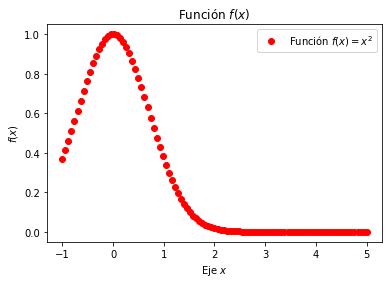

In [8]:
plt.plot(x, f(x), 'or', label="Función $f(x)=x^2$")
plt.xlabel("Eje $x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.title("Función $f(x)$")
plt.show() # Esto se debe poner para las script de python, no es necesario para Jupyter

Notamos varias cosas:

* Con diversas llamadas a funciones dentro de `plt.` se actualiza el gráfico *actual*. Esa es la forma de trabajar con la interfaz pyplot.
* Podemos añadir etiquetas, y escribir $\LaTeX$ en ellas. Tan solo hay que encerrarlo entre signos de dólar $$.
* Añadiendo como argumento `label` podemos definir una leyenda.

### Personalización

La función `plot` acepta una serie de argumentos para personalizar el aspecto de la función. Con una letra podemos especificar el color, y con un símbolo el tipo de línea.

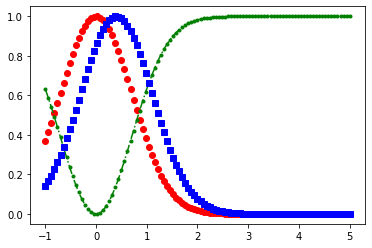

In [9]:
plt.plot(x, f(x), 'ro')
plt.plot(x, 1 - f(x), 'g-..')
plt.plot(x, f(x-0.4), 'bs')
plt.show() # Esto se debe poner para las script de python, no es necesario para Jupyter

Esto en realidad son códigos abreviados, que se corresponden con argumentos de la función `plot`:

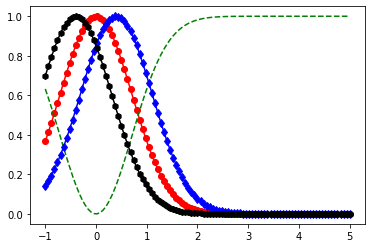

In [10]:
plt.plot(x, f(x), color='red', linestyle='-', marker='o')
plt.plot(x, 1 - f(x), c='green', ls='--')
plt.plot(x, f(x-0.4), c='blue', marker='d')
plt.plot(x, f(x+0.4),'kh-')

La lista de posibles argumentos y abreviaturas está disponible en la documentación de la función `plot` http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot.

### Más personalización, pero muchas más

Con matplotlib se puede manipular fácilmente la apariencia de la gráfica usando **estilos**. Para ver qué estilos hay disponibles, escribiríamos `plt.style.available`.

In [11]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Para emplear un estilo solo a una porción del código, creamos un bloque `with plt.style.context("STYLE")`:

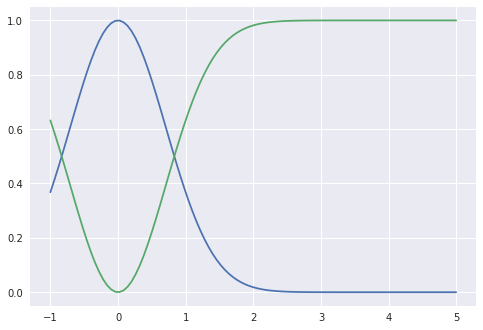

In [12]:
with plt.style.context('seaborn'):
    plt.plot(x, f(x))
    plt.plot(x, 1 - f(x))

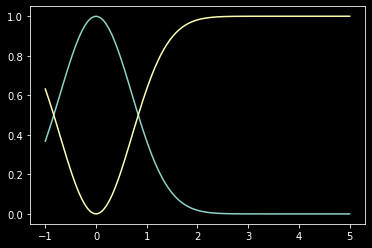

In [13]:
with plt.style.context('dark_background'):
    plt.plot(x, f(x))
    plt.plot(x, 1 - f(x))

### Otros tipo de gráficas

La función `scatter` muestra una nube de puntos, con posibilidad de variar también el tamaño y el color.

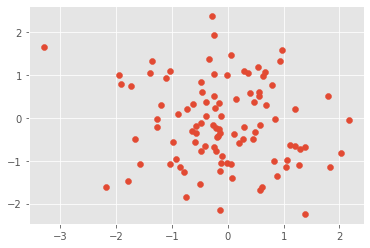

In [14]:
N = 100
x = np.random.randn(N)
y = np.random.randn(N)
with plt.style.context('ggplot'):
     plt.scatter(x, y)

Con `s` y `c` podemos modificar el tamaño y el color respectivamente. Para el color, a cada valor numérico se le asigna un color a través de un *mapa de colores*; ese mapa se puede cambiar con el argumento `cmap`. Esa correspondencia se puede visualizar llamando a la función `colorbar`.

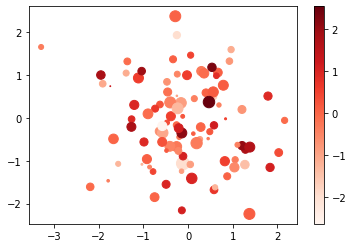

In [15]:
s = np.abs(50 + 50 * np.random.randn(N))
c = np.random.randn(N)

plt.scatter(x, y, s=s, c=c, cmap=plt.cm.Reds)
plt.colorbar()

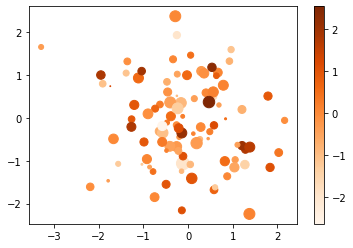

In [16]:
plt.scatter(x, y, s=s, c=c, cmap=plt.cm.Oranges)
plt.colorbar()

matplotlib trae por defecto muchos mapas de colores. En las SciPy Lecture Notes dan una lista de todos ellos (https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

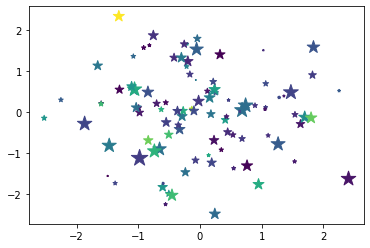

In [17]:
# %matplotlib inline

x = np.random.randn(100)
y = np.random.randn(100)
s = np.abs(100 * np.random.randn(100))
c = np.abs(np.random.randn(100))
plt.scatter(x, y, s, c, '*')

plt.show()

## Curvas de Nivel

In [18]:
def h(x, y):
    return x ** 2 - y ** 2

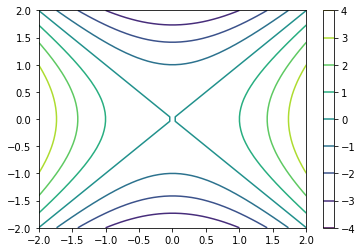

In [19]:
x = np.linspace(-2, 2)
y = np.linspace(-2, 2)
xx, yy = np.meshgrid(x, y)
zz = h(xx, yy)

plt.contour(xx, yy, zz)
plt.colorbar()

La función `contourf` es casi idéntica pero rellena el espacio entre niveles. Podemos especificar manualmente estos niveles usando el cuarto argumento:

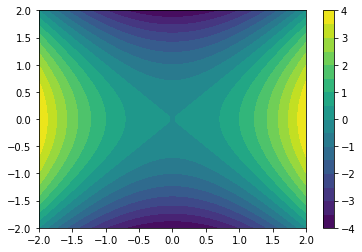

In [20]:
plt.contourf(xx, yy, zz, np.linspace(-4, 4, 17))
plt.colorbar()

Para guardar las gráficas en archivos aparte podemos usar la función `plt.savefig`. matplotlib usará el tipo de archivo adecuado según la extensión que especifiquemos. Veremos esto con más detalle cuando hablemos de la interfaz orientada a objetos.

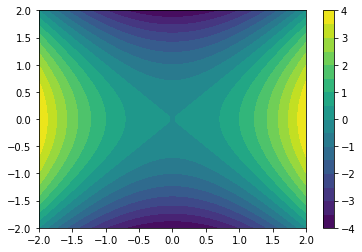

In [21]:
plt.contourf(xx, yy, zz, np.linspace(-4, 4, 17))
plt.colorbar()
plt.savefig('Ejemplo_01.png')  # png, jpg, eps

### Más curvas de Nivel

**Ejemplo**

Representar las curvas de nivel de esta función:

$$w(x, y) = \cos{x} + \sin^2{y}$$

In [22]:
# definamos la función!
def w(x, y):
    return np.cos(x) + np.sin(y) ** 2

In [23]:
# Necesitamos muchos puntos en la malla, para que cuando se
# crucen las líneas no se vean irregularidades
x = np.linspace(-2, 3, 1000)
y = np.linspace(-2, 3, 1000)

xx, yy = np.meshgrid(x, y) # Observemos este nueva función meshgrid de numpy

Text(0.5, 1.0, 'Función $w(x, y) = \\cos(x) + \\sin^2(y)$')

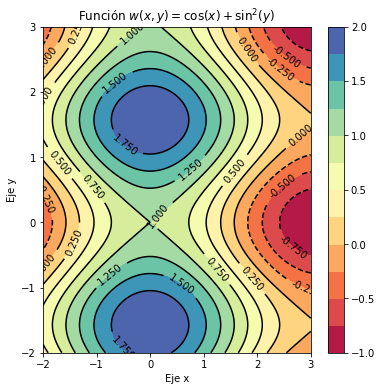

In [24]:
zz = w(xx, yy)

# Podemos ajustar el tamaño de la figura con figsize
# Ajustamos para que tenga 13 niveles y que use el colormap Spectral
fig = plt.figure(figsize=(6, 6))

# Tenemos que asignar la salida a la variable cs para luego crear el colorbar
cs = plt.contourf(xx, yy, zz, np.linspace(-1, 2, 13), cmap=plt.cm.Spectral)

# Creamos la barra de colores
plt.colorbar()  # Tiene que estar despues de "contourf"

# Con `colors='k'` dibujamos todas las líneas negras
# Asignamos la salida a la variable cs para crear las etiquetas
cs = plt.contour(xx, yy, zz, np.linspace(-1, 2, 13), colors='k')

# Creamos las etiquetas sobre las líneas
plt.clabel(cs)

# Ponemos las etiquetas de los ejes
plt.xlabel("Eje x")
plt.ylabel("Eje y")

# Colocamos el Título del Gráfico
plt.title("Función $w(x, y) = \cos(x) + \sin^2(y)$")

In [25]:
def g(x, y):
    return np.cos(x) + np.sin(y)**3

Otra representación!

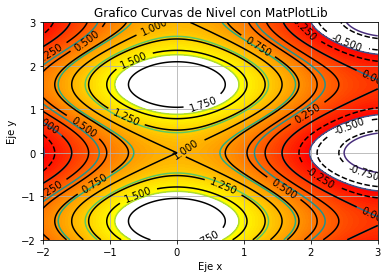

In [26]:
#zz = g(xx, yy)
zz = w(xx, yy)

fig, axes = plt.subplots()
axes.contour(xx, yy, zz)
#axes.contourf(xx, yy, zz, cmap=plt.cm.pink_r)
#axes.contourf(xx, yy, zz, np.linspace(-0.1, 1.9), hatches=['-', '/', '\\', '//'], 
#      extend='both', cmap=plt.cm.autumn)
axes.contourf(xx, yy, zz, np.linspace(-0.4, 1.6), cmap=plt.cm.autumn)
#axes.contour(xx, yy, zz, np.linspace(-0.9, 0.9), alpha=0.7, cmap=plt.cm.autumn)

# Asignamos la salida a la variable cs para crear las etiquetas
cs = plt.contour(xx, yy, zz, np.linspace(-1, 2, 13), colors='k')

# Creamos las etiquetas sobre las líneas
plt.clabel(cs)
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.title('Grafico Curvas de Nivel con MatPlotLib')
plt.grid()
plt.show()

### Varias figuras

Podemos crear figuras con varios sistemas de ejes, pasando a `subplot` el número de filas y de columnas.

Text(0.5, 1.0, 'Función coseno')

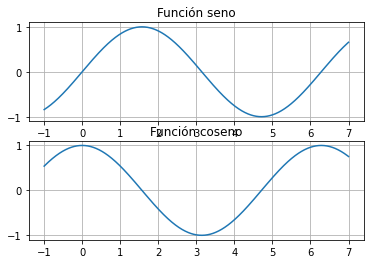

In [27]:
x = np.linspace(-1, 7, 1000)

fig = plt.figure()   ## Observar esta definición!!
plt.subplot(211)
plt.plot(x, np.sin(x))
plt.grid(True)
plt.title("Función seno")

plt.subplot(212)
plt.plot(x, np.cos(x))
plt.grid(True)
plt.title("Función coseno")

<div class="alert alert-info"> Para ajustar los gráficos para que no se solapen, usamos
 <b>fig.tight_layout()</b>
     
 También es útil buscar en Google "plt.subplot adjust"</div>

Como hemos guardado la figura en una variable, puedo recuperarla más adelate y seguir editándola.

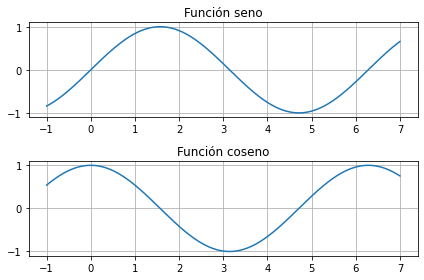

In [28]:
fig.tight_layout()   ### Con este llamado estoy haciendo que no se superpongan!!
fig

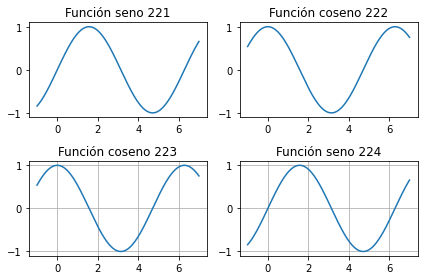

In [29]:
x = np.linspace(-1, 7, 1000)

fig = plt.figure()
plt.subplot(221)
plt.plot(x, np.sin(x))
plt.grid(False)
plt.title("Función seno 221")

plt.subplot(222)
plt.plot(x, np.cos(x))
plt.grid(False)
plt.title("Función coseno 222")

plt.subplot(223)
plt.plot(x, np.cos(x))
plt.grid(True)
plt.title("Función coseno 223")

plt.subplot(224)
plt.plot(x, np.sin(x))
plt.grid(True)
plt.title("Función seno 224")

fig.tight_layout()

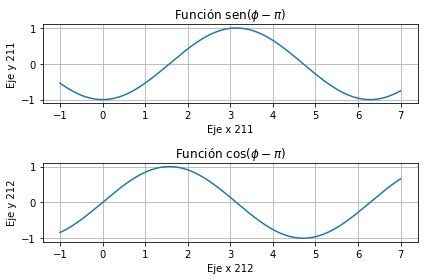

In [30]:
plt.subplot(211)
plt.plot(x, np.sin(x-np.pi/2.0))
plt.grid(True)
plt.title("Función sen($ \phi - \pi $)")
plt.xlabel("Eje x 211")
plt.ylabel("Eje y 211")

plt.subplot(212)
plt.plot(x, np.cos(x-np.pi/2.0))
plt.grid(True)
plt.title("Función cos($ \phi - \pi $)")
plt.xlabel("Eje x 212")
plt.ylabel("Eje y 212")
#fig = plt.figure()
plt.tight_layout()

**Ejemplo**

Crear una función que represente gráficamente esta expresión:

$$\sin(2 \pi \phi_1 t) + \sin(2 \pi \phi_2 t)$$

Siendo $\phi_1$ y $\phi_2$ argumentos de entrada (por defecto $10$ y $100$) y $t \in [0, 0.5]$. 

Además, debe mostrar:

* leyenda,
* título "Dos frecuencias",
* eje x "Tiempo ($t$)"

y usar algún estilo de los disponibles.

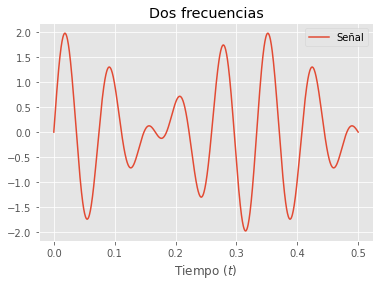

In [31]:
def frecuencias(f1=10.0, f2=100.0): # Aqui tenemos los valores 10.0 y 100.0 por defecto
    max_time = 0.5  # Aqui definimos el máximo del intervalo
    times = np.linspace(0, max_time, 1000) 
    signal = np.sin(2 * np.pi * f1 * times) + np.sin(2 * np.pi * f2 * times)
    with plt.style.context("ggplot"):  # definimos este estilo
        plt.plot(times, signal, label="Señal")
        plt.xlabel("Tiempo ($t$)")
        plt.title("Dos frecuencias")
        plt.legend()

frecuencias(12, 15)

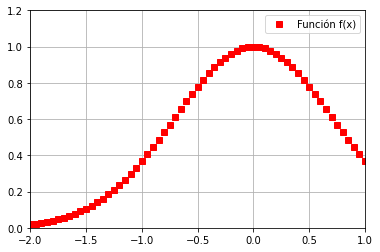

In [32]:
fig, axes = plt.subplots()
x = np.linspace(-2, 3, 101)
axes.plot(x,f(x), 'sr',label='Función f(x)')
axes.set_xlim(-2,1)
axes.set_ylim(0,1.2)
plt.legend()
plt.grid(True)
fig.savefig('Ejemplo18.png')
plt.show()

In [33]:
"""
Aqui definimos la función dada
"""
def f(x):
    return np.exp(-x ** 2)

In [34]:
# Definimos g(x)
def g(x):
    return 1.0/f(x)

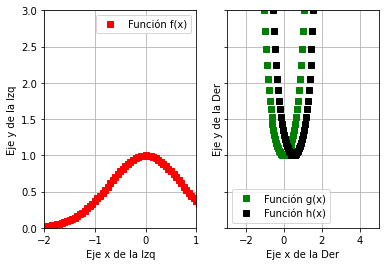

In [35]:
fig, axes = plt.subplots(1,2, sharey = True)
axes[0].plot(x,f(x), 'sr',label='Función f(x)')
axes[1].plot(x,g(x), 'sg',label='Función g(x)')
axes[1].plot(x,g(x-0.5), 's',color='black',label='Función h(x)')
axes[0].set_xlim(-2,1)
axes[1].set_xlim(-3,5)
axes[0].set_ylim(0,3)
#axes[1].set_ylim(0,5)
axes[0].set_xlabel("Eje x de la Izq")
axes[1].set_xlabel('Eje x de la Der')
axes[0].set_ylabel('Eje y de la Izq')
axes[1].set_ylabel('Eje y de la Der')
axes[0].legend()
axes[1].legend()
axes[0].grid(True)
axes[1].grid(True)
#fig.savefig('Ejemplo19.png')
plt.show()

### Grafiquemos una parábola 
y le agreguemos un punto

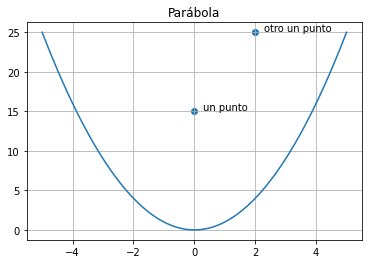

In [36]:
x = [0.1 * i for i in range(-50, 51)]
y = [x_i**2 for x_i in x]
plt.plot(x,y)
plt.title('Parábola')
plt.scatter([0, 2], [15, 25])
plt.annotate(text='un punto', xy=(0, 15), xytext=(0.3, 15.2))
plt.annotate(text='otro un punto', xy=(2, 25), xytext=(2.3, 25.2))
plt.grid()

### Grafiquemos una gaussiana
y probemos distintos tipos de símbolos

In [37]:
def gauss(x,mu=0,sigma=1):
    """
    definimos una funcion gaussiana con mu = 0 y sigma = 1 por defecto
    """
    return np.exp(-(x-mu)**2)/(2*sigma)/ (sigma*2*np.pi)

In [41]:
x = np.linspace(-10, 10, num=101)

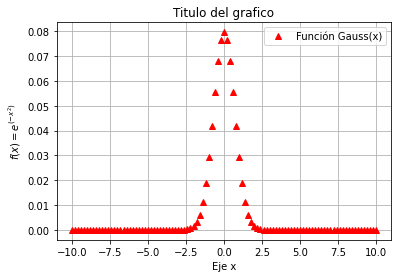

In [47]:
# %matplotlib inline
plt.plot(x, gauss(x),'^r', label='Función Gauss(x)') # d, h, o, p, s, v, ^, x, or, xg,
plt.xlabel('Eje x')
plt.ylabel('$f(x) = e^{(-x^2)}$')  # Observar el eje y
plt.legend()
plt.title('Titulo del grafico')
plt.grid(True)

<div class="alert alert-danger" role="alert">
    <center> <h1> The End </h1> </center>
__________________________________________________________________________________________________________________
</div>